In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib

In [51]:
# Load the dataset
filepath = "Resources/pipeline_incidents.csv"
incident_df = pd.read_csv(filepath, encoding="ISO-8859-1")
incident_df.head(5)

,Incident Number,Incident_Type,Date_Reported,Cause_Category,Cause_Agent,Population_Density,Province,Latitude,Longitude,Substance,...,Licensed_Max_Pressure,Actual_Operating_Pressure,Year_of_Manufacture,Year_of_Installation,Service_Year,Weld type,Seam_Type,Seam_Joining_Method,Coating_Location,Coating_Type
0,INC2008-115,Fire,12/02/2008,Equipment Failure,Maintenance,Low,British Columbia,56.63822,-121.65102,Not Applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INC2008-119,Release of Substance,12/08/2008,Defect and Deterioration,Maintenance,Low,British Columbia,55.03200,-123.03098,Natural Gas - Sweet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INC2008-120,Release of Substance,12/09/2008,Equipment Failure,Maintenance,Low,Manitoba,49.75544,-97.23050,Natural Gas - Sweet,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INC2008-121,Adverse Environmental Effects,12/10/2008,Equipment Failure,Maintenance,Low,Nova Scotia,45.18253,-61.65236,Not Applicable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INC2008-123,Fire,12/17/2008,External Interference,Maintenance,Very High,Alberta,53.54740,-113.35571,Not Applicable,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Drop unnecessary columns
dropcolumns = ['Incident Number', 'Date_Reported', 'Pipeline_Name', 'Latitude', 'Longitude']
dfcleaned = incident_df.drop(columns=dropcolumns)

In [61]:
# Separate numerical and categorical features
numerical_features = dfcleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = dfcleaned.select_dtypes(include=['object']).columns.tolist()


In [63]:
# Encode categorical columns using LabelEncoder
labelencoder = LabelEncoder()
for col in categorical_features:
    if col != 'Emergency_Level':
        dfcleaned[col] = dfcleaned[col].astype(str).fillna('Unknown')
        dfcleaned[col] = labelencoder.fit_transform(dfcleaned[col])

In [65]:
# Separate features and target variable
X = dfcleaned.drop(columns=['Emergency_Level'])
y = dfcleaned['Emergency_Level']

In [69]:
# Split the incidentdfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [72]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [76]:
# Evaluate the model's performance
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report_output}")


Accuracy: 0.8714788732394366
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      0.92      0.90       361
           2       1.00      0.10      0.18        10
           3       0.50      0.17      0.25         6
           4       0.84      0.84      0.84       190

    accuracy                           0.87       568
   macro avg       0.65      0.41      0.44       568
weighted avg       0.87      0.87      0.86       568



c:\Users\NTEZA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NTEZA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NTEZA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [77]:
joblib.dump(model, 'pipelinemodel.pkl')

['pipelinemodel.pkl']

In [78]:
import joblib
import numpy as np
from tabpy.tabpy_tools.client import Client

# Load the model from the .pkl file
model = joblib.load("G:/GIT-HUB/canada_pipeline_incidents/Resources/pipeline_model.pkl")

# Define a function that will be used for predictions in Tableau
def EmergencyLevelprediction(_arg1, _arg2, _arg3, _arg4, _arg5, _arg6, _arg7, _arg8, _arg9, _arg10):

    # Combine the input arguments into a feature matrix
    inputdata = np.columnstack([_arg1, _arg2, _arg3, _arg4, _arg5, _arg6, _arg7, _arg8, _arg9, _arg10])
    
    # Make predictions
    predictions = model.predict(inputdata)
    
    # Return predictions as a list
    return predictions.tolist()

# Connect to the running TabPy server
client = Client('http://localhost:9004/')

# Deploy the prediction function to TabPy
client.deploy('EmergencyLevelprediction', EmergencyLevelprediction, 
              'EmergencyLevelprediction', 
              override=True)


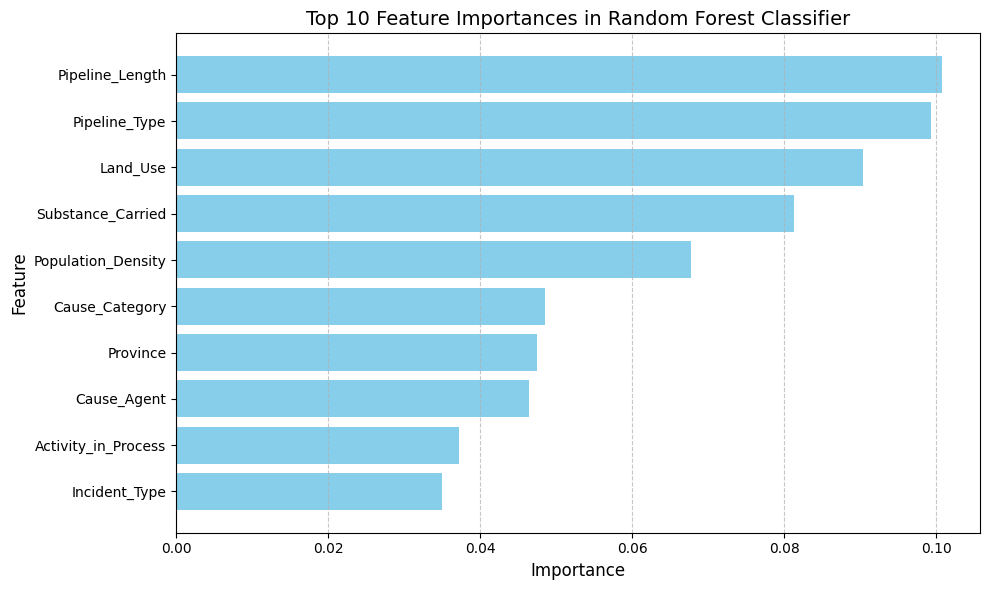

,Feature,Importance
19,Pipeline_Length,0.100701
8,Pipeline_Type,0.099282
21,Land_Use,0.090295
20,Substance_Carried,0.081213
3,Population_Density,0.067669
1,Cause_Category,0.048488
4,Province,0.047496
2,Cause_Agent,0.046372
9,Activity_in_Process,0.037242
0,Incident_Type,0.035012


In [80]:

# Get feature importances from the trained RandomForest model
importances = model.feature_importances_  # Corrected attribute
feature_names = X_train.columns

# Create a DataFrame to display feature importance
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)  # Corrected method name

# Display top 10 important features
top_n = 10
top_features = feature_importances_df.head(top_n)

# Plot the top N feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title(f'Top {top_n} Feature Importances in Random Forest Classifier', fontsize=14)
plt.gca().invert_yaxis()  # Corrected method name to invert the y-axis
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Return top N important features for display
top_features
